<a href="https://colab.research.google.com/github/Betsy194/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
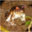

In [4]:
X_train[0]

In [5]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
def plot_sample(index):
  plt.figure(figsize=(10,4))
  plt.imshow(X_train[index])

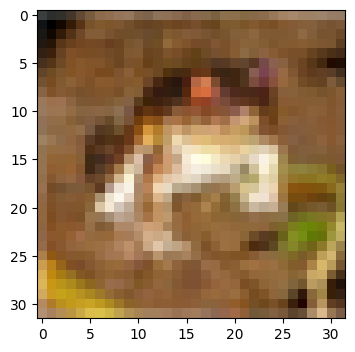

In [7]:
plot_sample(0)

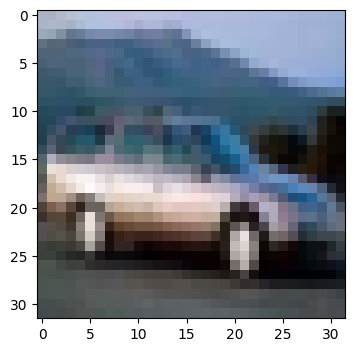

In [8]:
plot_sample(4)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[y_train[3][0]]

'deer'

In [12]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10
)

y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.3022 - loss: 1.9336
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.4171 - loss: 1.6497
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 92ms/step - accuracy: 0.4507 - loss: 1.5519
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 93ms/step - accuracy: 0.4764 - loss: 1.4842
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.4946 - loss: 1.4355
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - accuracy: 0.5097 - loss: 1.3900
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 95ms/step - accuracy: 0.5240 - loss: 1.3556
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 90ms/step - accuracy: 0.5357 - loss: 1.3257
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.5490 - loss: 1.2821
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 93ms/step - accuracy: 0.5646 - loss: 1.2450


In [23]:
model.predict(X_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


array([0.49488187, 0.6556961 , 0.6123472 , 0.888658  , 0.5885218 ,
       0.72155696, 0.6056701 , 0.00589162, 0.7937426 , 0.09436937],
      dtype=float32)

In [24]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


3

In [26]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


'cat'

In [22]:
classes[y_test[0][0]]

'cat'

In [27]:
classes[y_test[1][0]]

'ship'

In [28]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.5053 - loss: 1.3903


[1.3972724676132202, 0.5011000037193298]